# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-mipt/basic_s21/homeworks_basic/Lab1_ML_pipeline_and_SVM/car_data.csv

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
np.random.seed(333)

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [3]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,397,89,41,75,162,66,5,153,43,19,136,175,352,154,72,2,0,188,195
1,390,86,42,65,113,50,8,152,45,19,141,169,332,171,85,4,16,179,183
2,545,88,44,84,135,55,12,155,44,20,158,176,351,164,75,7,11,183,195
3,537,86,40,66,139,59,7,122,54,17,139,145,225,143,63,7,11,202,208
4,352,91,46,78,148,61,9,147,45,19,152,168,323,199,70,13,11,189,200
5,620,108,56,103,234,73,10,221,30,25,174,232,718,214,73,8,3,187,197
6,492,85,43,66,130,57,6,151,45,19,143,173,333,168,86,4,9,180,183
7,231,85,33,40,115,57,3,112,61,17,119,130,184,127,86,12,21,181,183
8,79,89,44,68,113,50,7,150,45,19,147,171,328,189,88,6,5,179,182
9,411,78,36,51,116,56,4,120,57,17,124,135,209,135,84,1,12,177,184


Methods `describe` and `info` deliver some useful information.

In [4]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,418.712204,93.728597,44.690346,81.983607,168.511840,61.502732,8.530055,168.601093,41.052823,20.584699,147.673953,188.333333,439.295082,173.559199,72.307832,6.453552,12.493625,189.034608,195.712204
std,240.487008,8.360989,6.218256,15.764974,33.402139,7.919905,4.469024,33.929286,7.963588,2.638607,14.687787,32.312683,180.461696,32.811598,7.566611,4.933881,8.820310,6.191639,7.459933
min,0.000000,73.000000,33.000000,40.000000,104.000000,47.000000,3.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,214.000000,87.000000,40.000000,70.000000,141.000000,57.000000,6.000000,145.000000,33.000000,19.000000,136.000000,166.000000,313.000000,147.000000,67.000000,2.000000,5.000000,184.000000,191.000000
50%,422.000000,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.000000,363.000000,172.000000,71.000000,6.000000,11.000000,189.000000,197.000000
75%,618.000000,100.000000,49.000000,98.000000,194.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,586.000000,198.000000,75.000000,10.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,59.000000,112.000000,333.000000,138.000000,52.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.000000,135.000000,22.000000,41.000000,206.000000,211.000000


In [5]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int64
 1   1       549 non-null    int64
 2   2       549 non-null    int64
 3   3       549 non-null    int64
 4   4       549 non-null    int64
 5   5       549 non-null    int64
 6   6       549 non-null    int64
 7   7       549 non-null    int64
 8   8       549 non-null    int64
 9   9       549 non-null    int64
 10  10      549 non-null    int64
 11  11      549 non-null    int64
 12  12      549 non-null    int64
 13  13      549 non-null    int64
 14  14      549 non-null    int64
 15  15      549 non-null    int64
 16  16      549 non-null    int64
 17  17      549 non-null    int64
 18  18      549 non-null    int64
dtypes: int64(19)
memory usage: 81.6 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Let's check how many elements of each class in train dataset. Dataset shouldn't be unbalanced. 

In [6]:
for class_name in np.unique(y_train):
    print(f"Count of class {class_name}: {(y_train == class_name).sum()}")

min_num_each = max((y_train == class_name).sum() for class_name in 
                   np.unique(y_train))
print(min_num_each)

Count of class bus: 133
Count of class opel: 141
Count of class saab: 142
Count of class van: 133
142


In [7]:
def balance_classes(X: np.ndarray, y: np.ndarray, min_num_each: int):
    classes = np.unique(y)
    X_new = []
    y_new = []
    for class_name in classes:
        count = (y == class_name).sum()
        need_add = max(0, min_num_each - count)
        X_cur_class = X[y == class_name,:]
        X_new.append(X_cur_class)
        X_new.append(X_cur_class[np.random.randint(0, count, size=need_add)])
        y_new.append(np.array([class_name] * (count + need_add)))
    X_new = np.concatenate(X_new)
    y_new = np.concatenate(y_new)
    indeces = np.arange(len(X_new))
    np.random.shuffle(indeces)
    return X_new[indeces], y_new[indeces]

In [8]:
X_train, y_train = balance_classes(X_train, y_train, min_num_each)

for class_name in np.unique(y_train):
    print(f"Count of class {class_name}: {(y_train == class_name).sum()}")

Count of class bus: 142
Count of class opel: 142
Count of class saab: 142
Count of class van: 142


I will do feature scaling. We need features to have the equal mean and scale to make PCA and linear models with regularization work well. 

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def make_basic_pipeline(model):
    return Pipeline([
        ("Scaler", StandardScaler()),
        ("Model", model),
    ])

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [10]:
import warnings

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
from sklearn.exceptions import ConvergenceWarning

def find_best_params(model, params_grid, X_train, y_train, X_test, y_test):
    searcher = GridSearchCV(
        model,
        params_grid,
        scoring="accuracy",
        refit=True,
    )
    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        searcher.fit(X_train, y_train)

    print("Best parameters:", searcher.best_params_)
    model = searcher.best_estimator_

    y_pred = model.predict(X_test)
    print("Accuracy score:", accuracy_score(y_test, y_pred))
    print("F1 score:", f1_score(y_test, y_pred, average="macro"))
    return model, searcher.best_params_

In [11]:
params_grid = {
    "Model__C": [0.1, 1, 2, 5, 10, 15, 25, 50, 75, 100, 200],
    "Model__penalty": ["l1", "l2"],
}

model = make_basic_pipeline(
    LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        tol=1e-3,
        max_iter=500,
    )
)

model, best_params = find_best_params(model, params_grid, X_train, y_train,
                                      X_test, y_test)

Best parameters: {'Model__C': 15, 'Model__penalty': 'l2'}
Accuracy score: 0.8114478114478114
F1 score: 0.8075045050555744


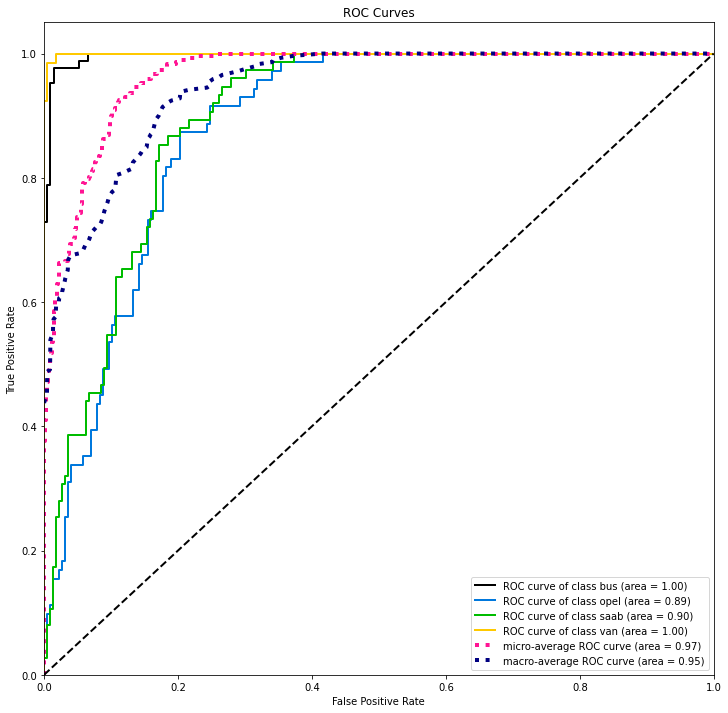

In [12]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

from scikitplot.metrics import plot_roc
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(X_test)
plot_roc(y_test, y_pred_proba, figsize=(12, 12))
plt.show()

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

In [13]:
from sklearn.decomposition import PCA

num_features = X_train.shape[1]
pca = PCA()
pca.fit(X_train)

PCA()

In [14]:
explained_var = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var)

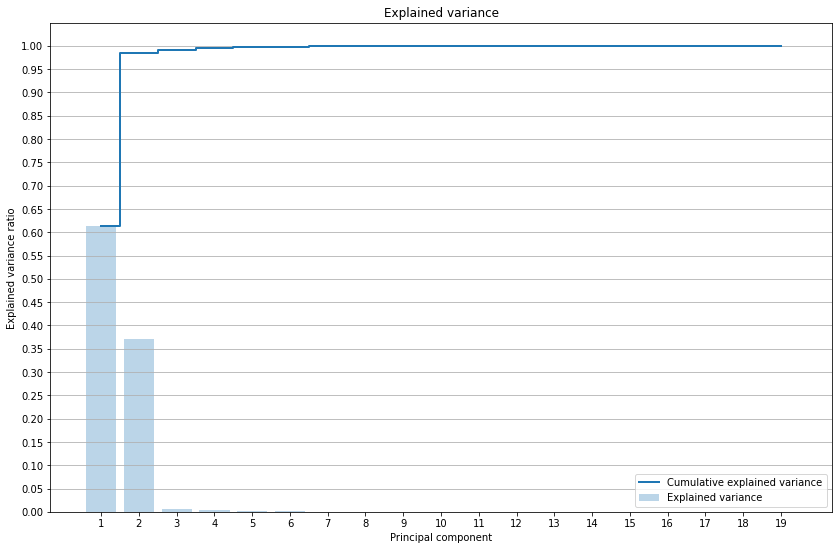

In [15]:
plt.figure(figsize=(14, 9))
plt.title("Explained variance")
plt.bar(range(1, num_features + 1), pca.explained_variance_ratio_, alpha=0.3, 
        align="center", label="Explained variance")
plt.step(range(1, num_features + 1), explained_var_cumsum,
         label="Cumulative explained variance", linewidth=2, where="mid")
plt.xticks(range(1, num_features + 1))
plt.yticks(np.arange(0, 1.01, 0.05))
plt.xlabel("Principal component")
plt.ylabel("Explained variance ratio")
plt.grid(axis="y")
plt.legend()
plt.show()

Usually number of components is chosen to make explained variance be ~95%. So I will do it. Here it is 2 components.

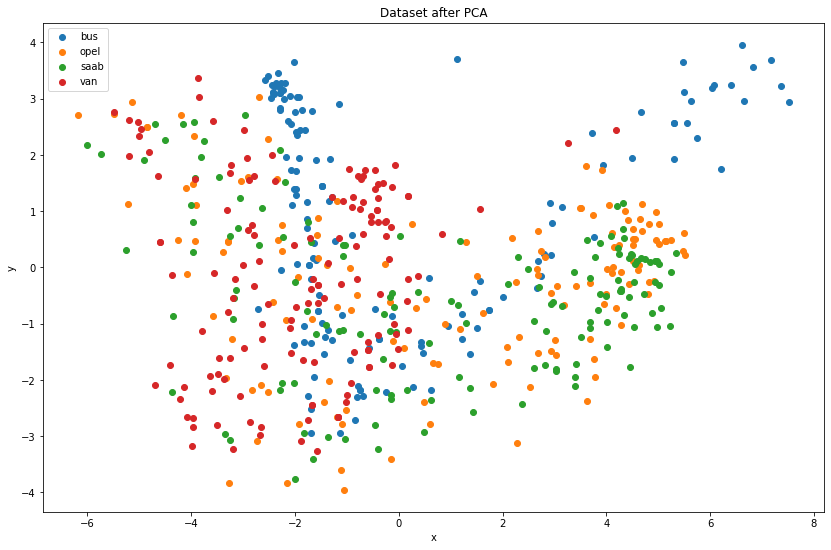

In [16]:
X_pca = Pipeline([
    ("Scale", StandardScaler()),
    ("PCA", PCA(n_components=0.95)),
]).fit_transform(X_train)

plt.figure(figsize=(14, 9))
plt.title("Dataset after PCA")
for class_name in np.unique(y_train):
    indeces = (y_train == class_name)
    plt.scatter(X_pca[indeces,0], X_pca[indeces,1], label=class_name)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

After transformation classes seem to be mixed. We can only clearly see red cluster on left side.

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [17]:
def make_pca_pipeline(model):
    return Pipeline([
        ("Scale", StandardScaler()),
        ("PCA", PCA(n_components=0.95)),
        ("Scale after PCA", StandardScaler()),
        ("Model", model),
    ])

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [18]:
params_grid = {
    "Model__C": [0.1, 1, 2, 5, 10, 15, 25, 50, 75, 100, 200],
    "Model__penalty": ["l1", "l2"],
}

model = make_pca_pipeline(
    LogisticRegression(
        multi_class="multinomial",
        solver="saga",
        tol=1e-3,
    )
)

model, log_reg_best_params = find_best_params(model, params_grid, X_train,
                                              y_train, X_test, y_test)

Best parameters: {'Model__C': 10, 'Model__penalty': 'l2'}
Accuracy score: 0.67003367003367
F1 score: 0.6648285645617625


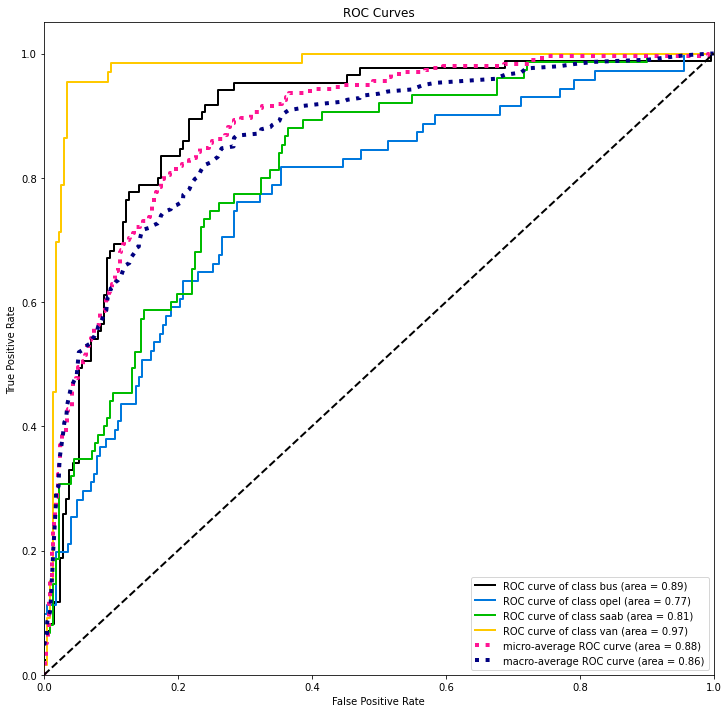

In [19]:
y_pred_proba = model.predict_proba(X_test)
plot_roc(y_test, y_pred_proba, figsize=(12, 12))
plt.show()

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [20]:
from sklearn.tree import DecisionTreeClassifier

params_grid = {
    "Model__max_depth": [3, 5, 7, 10, 15],
}

model = make_pca_pipeline(DecisionTreeClassifier())

model, tree_best_params = find_best_params(model, params_grid, X_train,
                                           y_train, X_test, y_test)

Best parameters: {'Model__max_depth': 10}
Accuracy score: 0.6195286195286195
F1 score: 0.6280121559380023


#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [21]:
from sklearn.ensemble import BaggingClassifier

def test_bagging(n_estimators: int,
                 base_estimator,
                 X_train,
                 y_train,
                 X_test,
                 y_test):
    bagging = make_pca_pipeline(
        BaggingClassifier(base_estimator, n_estimators))

    with warnings.catch_warnings():
        warnings.filterwarnings("ignore", category=ConvergenceWarning)
        bagging.fit(X_train, y_train)

    y_pred = bagging.predict(X_test)
    return f1_score(y_test, y_pred, average="macro"),\
           accuracy_score(y_test, y_pred)

In [22]:
n_estimators_list = [*range(2, 100, 5), 100]
n_estimators_list

[2,
 7,
 12,
 17,
 22,
 27,
 32,
 37,
 42,
 47,
 52,
 57,
 62,
 67,
 72,
 77,
 82,
 87,
 92,
 97,
 100]

In [23]:
base_estimator = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    **{key.split("__")[1]: val for key, val in log_reg_best_params.items()}
)

f1_scores = []
acc_scores = []

for n_estimators in n_estimators_list:
    f1, acc = test_bagging(n_estimators, base_estimator, X_train, y_train,
                           X_test, y_test)
    f1_scores.append(f1)
    acc_scores.append(acc)

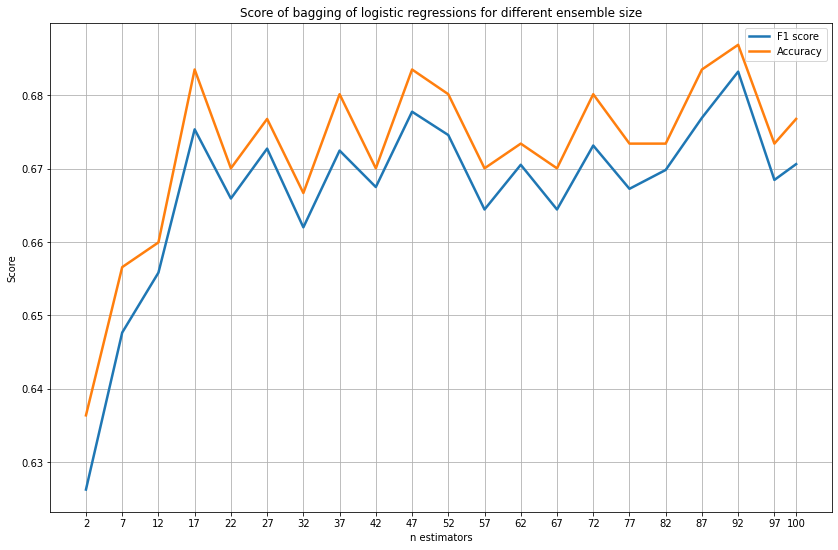

In [24]:
plt.figure(figsize=(14, 9))
plt.title("Score of bagging of logistic regressions "
          "for different ensemble size")
plt.plot(n_estimators_list, f1_scores, label="F1 score", linewidth=2.5)
plt.plot(n_estimators_list, acc_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("n estimators")
plt.xticks(n_estimators_list)
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

Increasing number of logistic regressions doesn't improve quality.

In [25]:
base_estimator = DecisionTreeClassifier(
    **{key.split("__")[1]: val for key, val in tree_best_params.items()}
)

f1_scores = []
acc_scores = []

for n_estimators in n_estimators_list:
    f1, acc = test_bagging(n_estimators, base_estimator, X_train, y_train,
                           X_test, y_test)
    f1_scores.append(f1)
    acc_scores.append(acc)

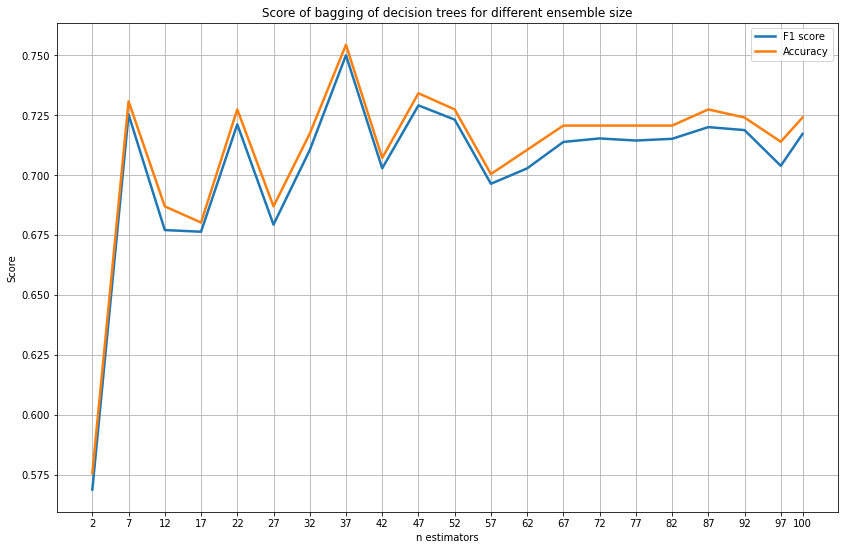

In [26]:
plt.figure(figsize=(14, 9))
plt.title("Score of bagging of decision trees for different ensemble size")
plt.plot(n_estimators_list, f1_scores, label="F1 score", linewidth=2.5)
plt.plot(n_estimators_list, acc_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("n estimators")
plt.xticks(n_estimators_list)
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

Optimal number of trees ~35. Further there is not significant improvement.

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [27]:
from sklearn.ensemble import RandomForestClassifier

f1_scores = []
acc_scores = []

for n_estimators in n_estimators_list:
    model = make_pca_pipeline(
        RandomForestClassifier(n_estimators=n_estimators,
                               max_depth=tree_best_params["Model__max_depth"])
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score(y_test, y_pred)
    f1_scores.append(f1)
    acc_scores.append(acc)

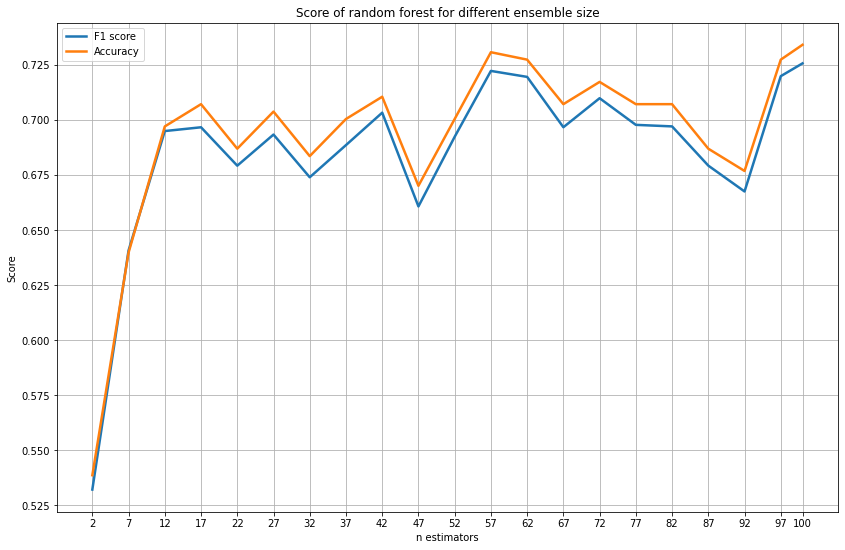

In [28]:
plt.figure(figsize=(14, 9))
plt.title("Score of random forest for different ensemble size")
plt.plot(n_estimators_list, f1_scores, label="F1 score", linewidth=2.5)
plt.plot(n_estimators_list, acc_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("n estimators")
plt.xticks(n_estimators_list)
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

In comparision with naive bagging of trees random forest needs less ensemble size.

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

In [29]:
def split_into_parts(size: int, n_parts: int):
    part_size = size // n_parts
    last_index = 0
    indeces = list(range(size))
    for i in range(n_parts):
        if (size - i * part_size) // (part_size + 1) == n_parts - i:
            part_size += 1
        last_index += part_size
        yield indeces[:last_index]

In [30]:
list(split_into_parts(10, 6))

[[0],
 [0, 1],
 [0, 1, 2, 3],
 [0, 1, 2, 3, 4, 5],
 [0, 1, 2, 3, 4, 5, 6, 7],
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]

In [31]:
n_parts = 10
x_ticks = list(range(1, n_parts + 1))

In [32]:
base_estimator = LogisticRegression(
    multi_class="multinomial",
    solver="saga",
    tol=1e-3,
    **{key.split("__")[1]: val for key, val in log_reg_best_params.items()}
)

f1_scores = []
acc_scores = []

for train_indeces in split_into_parts(len(X_train), n_parts):
    model = make_pca_pipeline(base_estimator)
    model.fit(X_train[train_indeces], y_train[train_indeces])
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score(y_test, y_pred)
    f1_scores.append(f1)
    acc_scores.append(acc)

/home/bulat/Programming/ml-mipt/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bulat/Programming/ml-mipt/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bulat/Programming/ml-mipt/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bulat/Programming/ml-mipt/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/bulat/Programming/ml-mipt/venv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


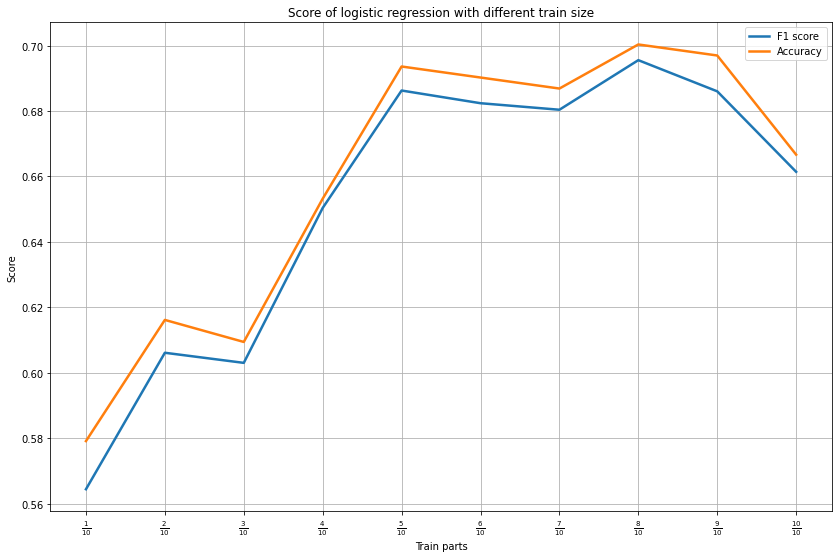

In [33]:
plt.figure(figsize=(14, 9))
plt.title("Score of logistic regression with different train size")
plt.plot(x_ticks, f1_scores, label="F1 score", linewidth=2.5)
plt.plot(x_ticks, acc_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("Train parts")
plt.xticks(ticks=x_ticks,
           labels=["$\\frac{%d}{%d}$" % (p, n_parts) for p in x_ticks])
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

In [34]:
base_estimator = DecisionTreeClassifier(
    **{key.split("__")[1]: val for key, val in tree_best_params.items()}
)

f1_scores = []
acc_scores = []

for train_indeces in split_into_parts(len(X_train), n_parts):
    model = make_pca_pipeline(base_estimator)
    model.fit(X_train[train_indeces], y_train[train_indeces])
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score(y_test, y_pred)
    f1_scores.append(f1)
    acc_scores.append(acc)

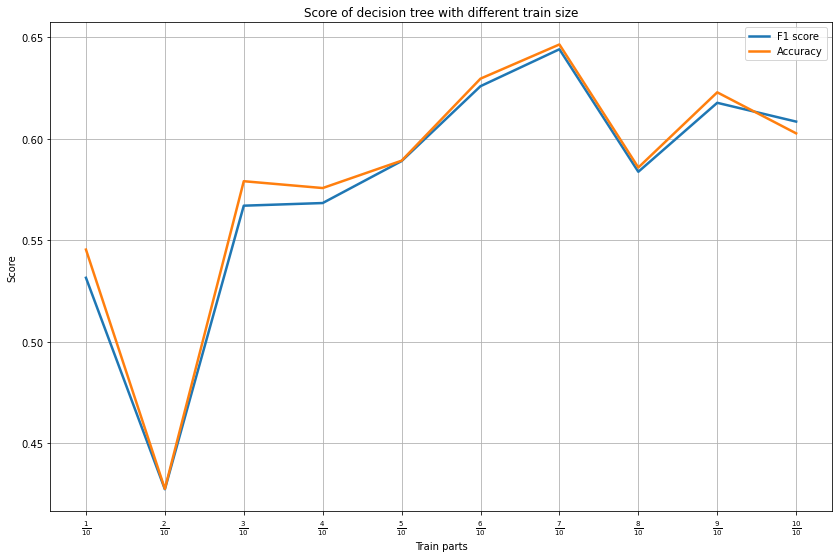

In [35]:
plt.figure(figsize=(14, 9))
plt.title("Score of decision tree with different train size")
plt.plot(x_ticks, f1_scores, label="F1 score", linewidth=2.5)
plt.plot(x_ticks, acc_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("Train parts")
plt.xticks(ticks=x_ticks,
           labels=["$\\frac{%d}{%d}$" % (p, n_parts) for p in x_ticks])
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

In [36]:
base_estimator = RandomForestClassifier(
    n_estimators=17,
    max_depth=tree_best_params["Model__max_depth"],
)

f1_scores = []
acc_scores = []

for train_indeces in split_into_parts(len(X_train), n_parts):
    model = make_pca_pipeline(base_estimator)
    model.fit(X_train[train_indeces], y_train[train_indeces])
    y_pred = model.predict(X_test)
    f1 = f1_score(y_test, y_pred, average="macro")
    acc = accuracy_score(y_test, y_pred)
    f1_scores.append(f1)
    acc_scores.append(acc)

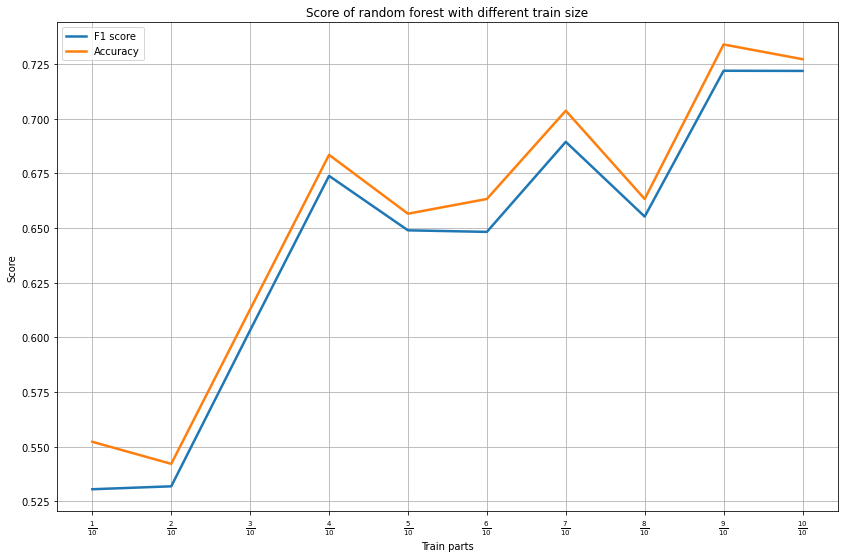

In [37]:
plt.figure(figsize=(14, 9))
plt.title("Score of random forest with different train size")
plt.plot(x_ticks, f1_scores, label="F1 score", linewidth=2.5)
plt.plot(x_ticks, acc_scores, label="Accuracy", linewidth=2.5)
plt.xlabel("Train parts")
plt.xticks(ticks=x_ticks,
           labels=["$\\frac{%d}{%d}$" % (p, n_parts) for p in x_ticks])
plt.ylabel("Score")
plt.grid()
plt.legend()
plt.show()

For all models bigger dataset size = better. But on linear regression from $\frac{5}{10}$ of size there is plateau.